# Chapter: Process Fault Detection via Time-Series Pattern Matching


# Topic: Discord Discovery

In [25]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt

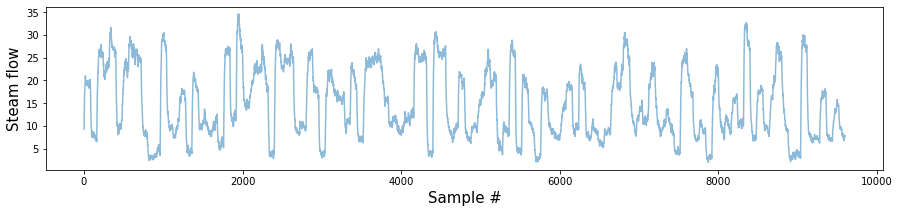

In [27]:
# read data
data = np.loadtxt('steamgen.dat')
steamFlow = data[:,8]

plt.figure(figsize=(15,3))
plt.plot(steamFlow, alpha=0.5)
plt.ylabel('Steam flow', fontsize=15), plt.xlabel('Sample #', fontsize=15)
plt.show()

In [48]:
# compute matrix profile
sequenceLength = 600
matrix_profile = stumpy.stump(steamFlow, sequenceLength)

The 'stump' function does the following: for every subsequence (of length sequenceLength) within the steamFlow time series, it automatically identifies its corresponding nearest-neighbor subsequence of the same length. 
Check out the nice visualization at https://stumpy.readthedocs.io/en/latest/index.html.

The first column contains the distance values and the nearest neighbor subsequence's indices are in the 2nd and 3rd columns.

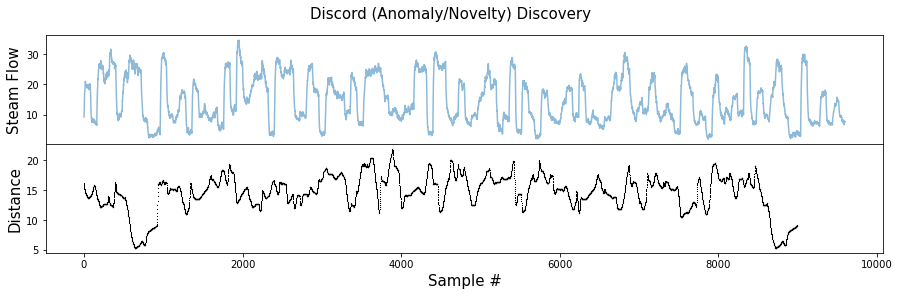

In [53]:
# plot matrix profile distances
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize=(15, 4))
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='15')
axs[0].plot(steamFlow, alpha=0.5)
axs[0].set_ylabel('Steam Flow', fontsize='15')
axs[1].set_xlabel('Sample #', fontsize ='15')

axs[1].set_ylabel('Distance', fontsize='15')
axs[1].plot(matrix_profile[:, 0], '*', color='black', ms=0.5)
plt.show()

To find the most unusual subsequence which can be a potential anomaly, we just need to find the subsequence position in the steamFlow time series that has the largest value from its nearest neighbor subsequence. 

In [50]:
# find discord 
discord_position = np.argsort(matrix_profile[:, 0])[-1]
print('The discord is located at index: ', discord_position)

The discord is located at index:  3890


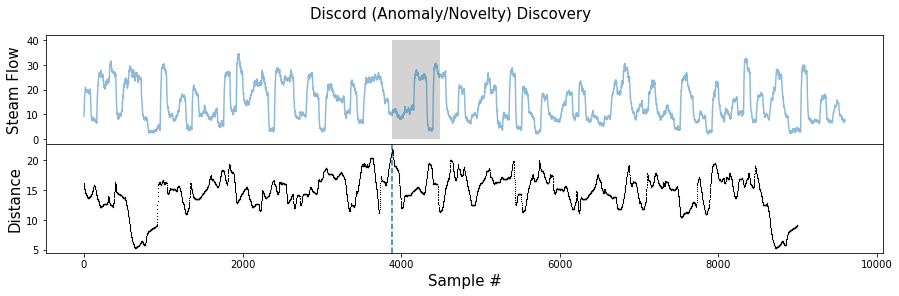

In [55]:
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize=(15, 4))
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='15')
axs[0].plot(steamFlow, alpha=0.5)
axs[0].set_ylabel('Steam Flow', fontsize='15')
rect = Rectangle((discord_position , 0), sequenceLength, 40, facecolor='lightgrey')
axs[0].add_patch(rect)

axs[1].set_xlabel('Sample #', fontsize ='15')
axs[1].set_ylabel('Distance', fontsize='15')
axs[1].axvline(x=discord_position, linestyle="dashed")
axs[1].plot(matrix_profile[:, 0], '*', color='black', ms=0.5)
plt.show()